<a href="https://colab.research.google.com/github/SuzaKrish/NLP/blob/master/AI_Assign5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Local Folder Upload


In [0]:
from google.colab import files
file = files.upload()

Saving SMSSpamCollection.txt to SMSSpamCollection.txt


#Data Preparation and Exploration

In [0]:
file.keys()
content = file.get('SMSSpamCollection.txt')
data = content.splitlines()
data = [i.decode('utf-8') for i in data]


In [0]:
h = 0
s = 0
label = []
modified_data = []
for i in data:
  j = i.split()
  if(j[0] == 'ham'): 
    h += 1
    label.append(1)
  elif(j[0] == 'spam'): 
    s += 1
    label.append(0)
  j = j[1: len(j)]
  modified_data.append(' '.join(j))


In [0]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution. """

    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
    return

def get_num_words_per_sample(sample_texts):
    """Gets the median number of words per sample given corpus."""

    num_words = [len(s.split()) for s in sample_texts]
    avg = np.median(num_words)
    print('The dataset has a median word count of: {}'.format(avg))
    return

def plot_class_distribution(labels):
    """Plots the class distribution."""

    num_classes = max(labels) + 1
    count_map = Counter(labels)
    counts = [count_map[i] for i in range(num_classes)]
    idx = np.arange(num_classes)
    rects = plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title('Class distribution')
    plt.xticks(idx, idx)
    height = counts
    for i in range(len(rects)):
      plt.annotate('{}'.format(height[i]), xy = (idx[i], height[i]))
    plt.show()


The dataset has a median word count of: 12.0


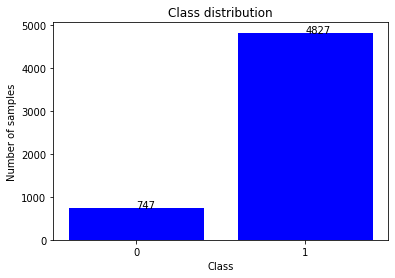

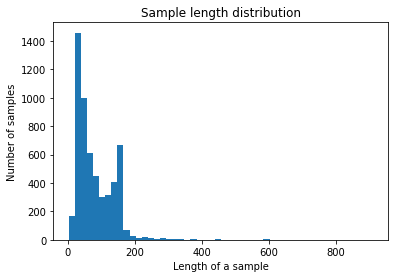

In [0]:
get_num_words_per_sample(modified_data)
plot_class_distribution(label)
plot_sample_length_distribution(modified_data)

#Data Preprocessing - Tokenization & Vectorization

In [0]:
#Train and Test split
xtrain, xtest, ytrain, ytest = train_test_split(modified_data, label, shuffle=True)
print(len(xtrain))
print(len(xtest))

4180
1394


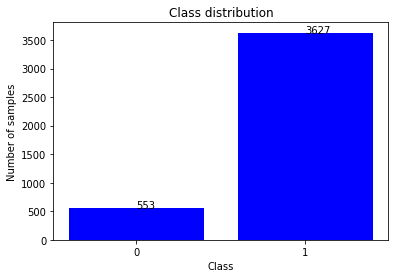

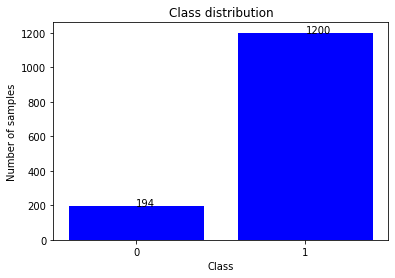

In [0]:
#Checking the distribution of data amongst the two classes in Training and Testing:
plot_class_distribution(ytrain)#Training distribution
plot_class_distribution(ytest)#Testing distribution

In [0]:
#Vectorizing and Tokenizing
def preprocess(tr, ts):
 count_vector_obj = CountVectorizer(analyzer='word', ngram_range=(1, 2), max_df=0.7)
 tokens_tr = count_vector_obj.fit_transform(tr)
 tfidf_obj = TfidfTransformer()
 tokens_tfidf_tr = tfidf_obj.fit_transform(tokens_tr)
 print(tokens_tr.shape)
 print(tokens_tfidf_tr.shape)
 tokens_ts = count_vector_obj.transform(ts)
 tokens_tfidf_ts = tfidf_obj.transform(tokens_ts)
 print(tokens_ts.shape)
 print(tokens_tfidf_ts.shape)
 return tokens_tfidf_tr, tokens_tfidf_ts


In [0]:
train_tokenized, test_tokenized = preprocess(xtrain, xtest)

(4180, 7463)
(4180, 7463)
(1394, 7463)
(1394, 7463)


#Building the Multinomial Naive Bayes Model

In [0]:
model = MultinomialNB().fit(train_tokenized, ytrain)

#Testing and Reports


In [0]:
predictions = model.predict(test_tokenized)

Accuracy: 96.987087517934%
Precision: 0.9668508287292817 
Recall: 1.0 
F1-score: 0.9831460674157304
Confusion Matrix: 
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       169
           1       0.97      1.00      0.98      1225

    accuracy                           0.97      1394
   macro avg       0.98      0.88      0.92      1394
weighted avg       0.97      0.97      0.97      1394



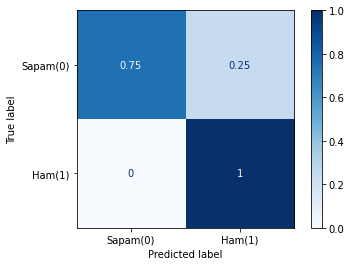

In [0]:
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.metrics import accuracy_score as a
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

acc = a(ytest, predictions)
accuracy = acc * 100
print('Accuracy: {}%'.format(accuracy))
p, r, f, s = prfs(ytest, predictions, average = 'binary')
print('Precision: {} \nRecall: {} \nF1-score: {}'.format(p, r, f))
confumat = CM(ytest, predictions)
print('Confusion Matrix: \n{}'.format(plot_confusion_matrix(model, test_tokenized, ytest, display_labels = ['Sapam(0)', 'Ham(1)'], cmap = plt.cm.Blues, normalize='true')))
print('Classification Report: \n{}'.format(classification_report(ytest, predictions)))